### Data preparation

In [18]:
import os

base_dir = ".\corn"
os.listdir(base_dir)

['1', '2', '3']

In [19]:
dir_1 = os.path.join(base_dir, str(1))
dir_2 = os.path.join(base_dir, str(2))
dir_3 = os.path.join(base_dir, str(3))

print(dir_1, dir_2, dir_3)

.\corn\1 .\corn\2 .\corn\3


In [20]:
from PIL import Image

SIZE = 224
clss = []
imgs = []

def read_files(source):
  cls = int(source[-1])
  filenames = os.listdir(source)
  for name in filenames:
    curr_path = os.path.join(source, name)
    curr_img = Image.open(curr_path)
    curr_img = curr_img.resize((SIZE, SIZE))
    curr_img = curr_img.convert('L')
    clss.append(cls)
    imgs.append(curr_img)


In [21]:
read_files(dir_1)

In [22]:
clss[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [23]:
imgs[:3]

[<PIL.Image.Image image mode=L size=224x224>,
 <PIL.Image.Image image mode=L size=224x224>,
 <PIL.Image.Image image mode=L size=224x224>]

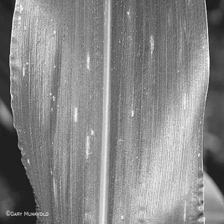

In [24]:
imgs[0]

In [25]:
read_files(dir_2)
read_files(dir_3)

In [26]:
print(len(imgs))
print(len(clss))

66
66


In [27]:
import numpy as np

np_imgs = []

for img in imgs:
  np_imgs.append(np.array(img))

In [28]:
len(np_imgs)

66

In [29]:
np_imgs[0]

array([[ 34,  31,  28, ...,  52,  58,  61],
       [ 35,  32,  30, ...,  52,  57,  60],
       [ 37,  34,  31, ...,  52,  57,  59],
       ...,
       [ 34,  36,  38, ..., 127, 124, 120],
       [ 31,  33,  35, ..., 119, 114, 110],
       [ 31,  33,  33, ..., 108, 104,  97]], dtype=uint8)

In [30]:
np_imgs[0].shape

(224, 224)

In [31]:
np_imgs = np.array(np_imgs)

In [32]:
np_imgs.shape

(66, 224, 224)

In [33]:
np_imgs[0].shape

(224, 224)

In [34]:
flatten_imgs = np.reshape(np_imgs, (66, -1))

In [35]:
flatten_imgs.shape

(66, 50176)

In [36]:
import pandas as pd

df_imgs = pd.DataFrame(flatten_imgs)
df_imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,34,31,28,28,31,31,31,31,31,32,...,127,126,124,121,118,116,111,108,104,97
1,93,96,98,105,111,107,103,109,117,119,...,143,153,143,135,130,135,134,129,122,129
2,96,96,99,100,102,102,108,104,103,113,...,139,131,124,129,132,144,153,143,134,140
3,86,89,88,81,80,80,84,92,95,91,...,25,27,20,22,49,98,105,82,74,85
4,39,47,49,37,41,41,36,18,108,113,...,219,220,188,83,68,109,112,85,60,46


In [37]:
mean_img = df_imgs.mean()
mean_img.shape

(50176,)

In [38]:
mean_img

0        103.045455
1         99.242424
2         97.424242
3        100.924242
4        104.939394
            ...    
50171    113.515152
50172    115.136364
50173    113.227273
50174    112.393939
50175    112.030303
Length: 50176, dtype: float64

In [39]:
mean_array = np.array(mean_img.tolist(), dtype=np.uint8)
mean_array

array([103,  99,  97, ..., 113, 112, 112], dtype=uint8)

In [40]:
mean_img = Image.fromarray(mean_array.reshape(224, 224))

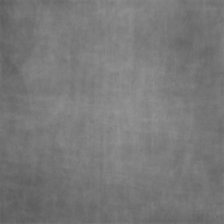

In [41]:
mean_img

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_imgs)

StandardScaler()

In [43]:
scaller_mean_img = scaler.mean_.astype('uint8')
scaller_mean_img

array([103,  99,  97, ..., 113, 112, 112], dtype=uint8)

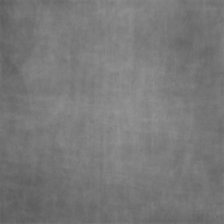

In [44]:
mean_img = Image.fromarray(scaller_mean_img.reshape(224, 224))
mean_img

In [45]:
scaled_imgs = scaler.transform(df_imgs)
scaled_imgs

array([[-1.04099463, -1.1121404 , -1.1159385 , ..., -0.07700657,
        -0.12203839, -0.21467483],
       [-0.15145478, -0.05284148,  0.00925484, ...,  0.23235896,
         0.13966126,  0.24237481],
       [-0.10622394, -0.05284148,  0.02532903, ...,  0.43860264,
         0.3141277 ,  0.39948562],
       ...,
       [-0.12130089, -0.00395077,  0.16999674, ..., -0.94617639,
        -0.96529284, -0.95738048],
       [-1.47822609, -1.53585996, -1.48564488, ..., -0.53368902,
        -0.54366562, -0.52889645],
       [-0.81484044, -0.46026414, -0.05504193, ..., -1.09349331,
        -1.12522041, -1.1430569 ]])

In [46]:
scaled_df_imgs = pd.DataFrame(scaled_imgs)
scaled_df_imgs

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,-1.040995,-1.112140,-1.115939,-1.159187,-1.128174,-1.124212,-1.136566,-1.121581,-1.154269,-1.142845,...,0.223127,0.194507,0.175805,0.168775,0.116652,0.039123,-0.062791,-0.077007,-0.122038,-0.214675
1,-0.151455,-0.052841,0.009255,0.064787,0.092473,-0.006019,-0.070867,0.045807,0.183071,0.190126,...,0.481201,0.612616,0.469360,0.386581,0.303673,0.338272,0.286353,0.232359,0.139661,0.242375
2,-0.106224,-0.052841,0.025329,-0.014692,-0.044850,-0.079584,0.003140,-0.029026,-0.034635,0.098197,...,0.416682,0.271935,0.175805,0.293236,0.334843,0.479974,0.574776,0.438603,0.314128,0.399486
3,-0.256993,-0.166920,-0.151487,-0.316711,-0.380528,-0.403272,-0.352093,-0.208624,-0.159039,-0.238876,...,-1.422096,-1.338558,-1.431022,-1.371418,-0.958719,-0.244281,-0.153872,-0.460031,-0.558204,-0.386068
4,-0.965610,-0.851390,-0.778380,-1.016125,-0.975593,-0.977082,-1.062559,-1.316145,0.043117,0.098197,...,1.707053,1.650145,1.164622,-0.422410,-0.662602,-0.071090,-0.047611,-0.415835,-0.761749,-0.943098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.754533,-0.900281,-0.906974,-0.920750,-0.945077,-0.932942,-0.914545,-0.837217,-0.827709,-0.790450,...,-0.131725,-0.502340,-0.735760,-0.951365,-1.192495,-1.377896,-1.429006,-1.417591,-1.430537,-1.414430
62,-0.799763,-0.606936,-0.537268,-0.618731,-0.670431,-0.653394,-0.603717,-0.448088,-0.314544,-0.300162,...,-0.873688,-1.044333,-1.122017,-1.060268,-1.021059,-1.078748,-1.034321,-0.887250,-0.819904,-0.828835
63,-0.121301,-0.003951,0.169997,0.144266,-0.060108,-0.064871,0.003140,0.120639,0.043117,-0.055018,...,-1.018855,-0.997877,-1.013865,-0.998038,-1.005474,-1.063003,-1.019141,-0.946176,-0.965293,-0.957380
64,-1.478226,-1.535860,-1.485645,-1.540685,-1.524884,-1.492039,-1.536203,-1.510710,-1.527480,-1.556526,...,-0.470448,-0.486855,-0.473106,-0.437968,-0.491166,-0.543429,-0.563736,-0.533689,-0.543666,-0.528896


### PCA

In [47]:
cov_mat = np.cov(scaled_imgs.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Covariance Matrix: \n', cov_mat, '\n\n')
print('Eigenvalues :\n', eigen_vals)

MemoryError: Unable to allocate 37.5 GiB for an array with shape (50176, 50176) and data type complex128

After this error, I have decided to use photos of size 112 x 112 pixels (4 times of pixels less)

In [49]:
SIZE = 112

clss = []
imgs = []

read_files(dir_1)
read_files(dir_2)
read_files(dir_3)

print(len(imgs))
print(len(clss))

66
66


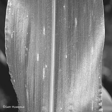

In [50]:
imgs[0]

In [51]:
import numpy as np

np_imgs = []

for img in imgs:
  np_imgs.append(np.array(img))

np_imgs = np.array(np_imgs)
np_imgs.shape

(66, 112, 112)

In [52]:
flatten_imgs = np.reshape(np_imgs, (66, -1))
flatten_imgs.shape

(66, 12544)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(flatten_imgs)

StandardScaler()

In [57]:
scaller_mean_img = scaler.mean_.astype('uint8')
scaller_mean_img

array([ 99,  97, 103, ..., 112, 113, 112], dtype=uint8)

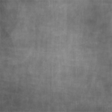

In [59]:
mean_img = Image.fromarray(scaller_mean_img.reshape(SIZE, SIZE))
mean_img

In [61]:
scaled_imgs = scaler.transform(flatten_imgs)
scaled_imgs

array([[-1.113613  , -1.16848791, -1.14650264, ...,  0.1431663 ,
         0.02407506, -0.08717196],
       [-0.05232424,  0.21567703,  0.16604521, ...,  0.35386388,
         0.27332276,  0.20939244],
       [-0.00178668,  0.07896938,  0.02372074, ...,  0.45110892,
         0.36679065,  0.31318998],
       ...,
       [-0.00178668,  0.16441166, -0.03953457, ..., -1.07239666,
        -1.01964968, -0.99169339],
       [-1.60214274, -1.59569932, -1.5576622 , ..., -0.52134145,
        -0.55231024, -0.54684679],
       [-0.65877496, -0.0064729 , -0.33999733, ..., -0.47271893,
        -0.95733776, -1.15480382]])

In [147]:
cov_mat = np.cov(scaled_imgs.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Covariance Matrix: \n', cov_mat, '\n\n')
print('Eigenvalues :\n', eigen_vals)

Covariance Matrix: 
 [[1.01538462 0.92929783 0.88378584 ... 0.41347063 0.39679301 0.39131136]
 [0.92929783 1.01538462 0.97973311 ... 0.41692398 0.38705042 0.36245896]
 [0.88378584 0.97973311 1.01538462 ... 0.3668816  0.33311114 0.3084061 ]
 ...
 [0.41347063 0.41692398 0.3668816  ... 1.01538462 0.99132283 0.94500605]
 [0.39679301 0.38705042 0.33311114 ... 0.99132283 1.01538462 0.9890748 ]
 [0.39131136 0.36245896 0.3084061  ... 0.94500605 0.9890748  1.01538462]] 


Eigenvalues :
 [ 2.63937037e+03+0.00000000e+00j  1.16632738e+03+0.00000000e+00j
  8.95155103e+02+0.00000000e+00j ... -2.43157132e-16+8.46583546e-17j
 -2.43157132e-16-8.46583546e-17j -2.46848722e-16+0.00000000e+00j]


In [148]:
eigen_vals.shape

(12544,)

In [149]:
cov_mat.shape

(12544, 12544)

In [150]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [151]:
eigen_pairs = [(abs(eigen_vals[i]), eigen_vecs[i])
               for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [152]:
for eigen_val, eigen_vec in eigen_pairs:
    print(eigen_vec)

[ 0.00856151+0.j          0.00573411+0.j          0.00175029+0.j
 ... -0.00018826+0.00043681j -0.00018826-0.00043681j
 -0.00014179+0.j        ]
[ 9.16373693e-03+0.0000000e+00j  4.12401525e-03+0.0000000e+00j
 -2.32208682e-04+0.0000000e+00j ... -3.92082641e-05+6.8927081e-06j
 -3.92082641e-05-6.8927081e-06j  1.41541208e-06+0.0000000e+00j]
[ 8.34852220e-03+0.00000000e+00j  3.85816857e-03+0.00000000e+00j
 -2.20426755e-03+0.00000000e+00j ... -5.10554410e-05+3.47094853e-05j
 -5.10554410e-05-3.47094853e-05j -2.05493971e-05+0.00000000e+00j]
[ 7.82650204e-03+0.00000000e+00j  5.06253855e-03+0.00000000e+00j
 -2.95981825e-04+0.00000000e+00j ... -2.76130818e-05+9.90963215e-07j
 -2.76130818e-05-9.90963215e-07j -1.11197835e-05+0.00000000e+00j]
[8.31786789e-03+0.00000000e+00j 5.07277139e-03+0.00000000e+00j
 2.75500138e-03+0.00000000e+00j ... 6.17319830e-05+2.04669846e-05j
 6.17319830e-05-2.04669846e-05j 8.01239085e-05+0.00000000e+00j]
[ 7.97215286e-03+0.00000000e+00j  5.11918012e-03+0.00000000e+00j
  3

[ 0.00729941+0.j         -0.00624665+0.j          0.0089575 +0.j
 ...  0.0047471 +0.00073597j  0.0047471 -0.00073597j
  0.00044301+0.j        ]
[ 0.00604469+0.j         -0.00338934+0.j          0.01128029+0.j
 ...  0.00228322+0.00054726j  0.00228322-0.00054726j
  0.00909977+0.j        ]
[ 0.00592153+0.j         -0.01720671+0.j          0.01535871+0.j
 ... -0.00735504+0.00571493j -0.00735504-0.00571493j
 -0.01042344+0.j        ]
[ 0.00527105+0.j         -0.01597702+0.j          0.01596915+0.j
 ... -0.00389866+0.00200316j -0.00389866-0.00200316j
 -0.00902242+0.j        ]
[ 0.00468108+0.j         -0.01646878+0.j          0.01196786+0.j
 ...  0.0058027 +0.00145582j  0.0058027 -0.00145582j
  0.00561236+0.j        ]
[ 0.01163016+0.j          0.00283251+0.j         -0.00689552+0.j
 ... -0.00182886+0.00081794j -0.00182886-0.00081794j
  0.00189161+0.j        ]
[ 0.01198995+0.j          0.00426168+0.j         -0.00501673+0.j
 ...  0.01723912+0.00131552j  0.01723912-0.00131552j
  0.01445345+0.j  

In [153]:
eigen_pairs[0][1].shape

(12544,)

In [154]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 8.56151322e-03+0.00000000e+00j  9.16373693e-03+0.00000000e+00j]
 [ 5.73411182e-03+0.00000000e+00j  4.12401525e-03+0.00000000e+00j]
 [ 1.75028913e-03+0.00000000e+00j -2.32208682e-04+0.00000000e+00j]
 ...
 [-1.88262871e-04+4.36810171e-04j -3.92082641e-05+6.89270810e-06j]
 [-1.88262871e-04-4.36810171e-04j -3.92082641e-05-6.89270810e-06j]
 [-1.41785113e-04+0.00000000e+00j  1.41541208e-06+0.00000000e+00j]]


In [155]:
w.shape

(12544, 2)

In [156]:
w[:,0]

array([ 0.00856151+0.j        ,  0.00573411+0.j        ,
        0.00175029+0.j        , ..., -0.00018826+0.00043681j,
       -0.00018826-0.00043681j, -0.00014179+0.j        ])

In [157]:
w[:,0].shape

(12544,)

In [158]:
def img_from_array(img):
    return Image.fromarray((abs(img).astype('uint8')).reshape(SIZE, SIZE))

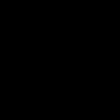

In [159]:
img_from_array(w[:,0])

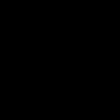

In [160]:
img_from_array(w[:,1])

Firsts principal components are almost black

In [161]:
pca_imgs = scaled_imgs.dot(w)
pca_imgs.shape

(66, 2)

In [189]:
pca_imgs[:10]

array([[-0.04489892-0.05143743j, -0.00294905-0.00832628j],
       [-0.01326893+0.01138861j, -0.03338835-0.0011371j ],
       [-0.17924977-0.02294877j, -0.02225212-0.00094197j],
       [-0.25524047+0.04306648j, -0.09809611+0.00521233j],
       [ 0.09021756+0.17636918j, -0.04405435+0.00738638j],
       [ 0.18051845-0.07277528j,  0.16680766-0.00189052j],
       [-0.20232126+0.02154393j, -0.08051314-0.00111891j],
       [-0.14291893-0.09194054j,  0.00402873-0.00327923j],
       [ 0.30737873-0.00639034j,  0.21982826+0.0042917j ],
       [ 0.14643246-0.01439029j, -0.01493495-0.00020995j]])

In [190]:
abs(pca_imgs)[:10]

array([[0.0682768 , 0.00883311],
       [0.01748614, 0.03340771],
       [0.18071283, 0.02227205],
       [0.25884825, 0.09823449],
       [0.19810426, 0.04466928],
       [0.19463595, 0.16681837],
       [0.20346507, 0.08052092],
       [0.16993788, 0.00519462],
       [0.30744515, 0.21987015],
       [0.14713785, 0.01493643]])

In [164]:
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']

plot_params = [(np.unique(clss)).tolist(), colors, markers]
plot_params


[[1, 2, 3], ['r', 'g', 'b'], ['o', 's', '^']]

In [165]:
def get_indexes(list_with_item, item):
    indexes = []
    for i in range(len(list_with_item)):
        if list_with_item[i] == item:
            indexes.append(i)
    return indexes

In [166]:
abs(pca_imgs)[get_indexes(clss, 1)]

array([[0.0682768 , 0.00883311],
       [0.01748614, 0.03340771],
       [0.18071283, 0.02227205],
       [0.25884825, 0.09823449],
       [0.19810426, 0.04466928],
       [0.19463595, 0.16681837],
       [0.20346507, 0.08052092],
       [0.16993788, 0.00519462],
       [0.30744515, 0.21987015],
       [0.14713785, 0.01493643],
       [0.89650448, 0.27070797],
       [0.19900599, 0.1477571 ],
       [0.14854288, 0.1118259 ],
       [0.28830383, 0.00826999],
       [0.83204519, 0.15477254],
       [0.05393809, 0.12386492],
       [0.09019805, 0.16908171],
       [0.15033564, 0.01879109],
       [0.10762463, 0.16494079],
       [0.11915253, 0.11488778],
       [0.10764198, 0.39184848],
       [0.29510766, 0.10341695]])

22
22
22


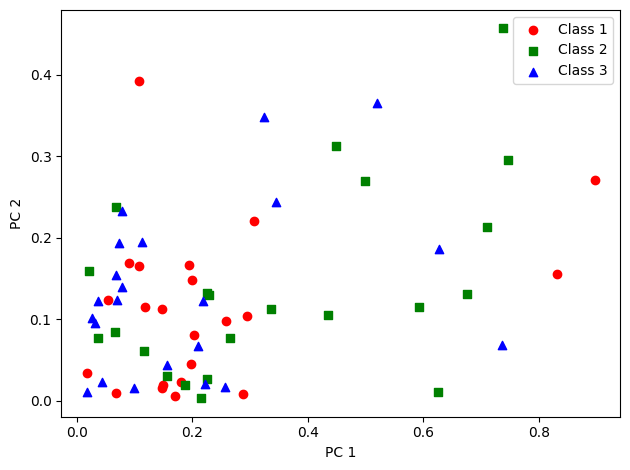

In [167]:
for i in range(3):
    cls = plot_params[0][i]
    color = plot_params[1][i]
    marker = plot_params[2][i]
    points = abs(pca_imgs)[get_indexes(clss, cls)]
    print(len(points))
    plt.scatter(points[:,0], 
                points[:,1], 
                c=color, label=f'Class {cls}', marker=marker)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

It is hard to separate classes.

In [178]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
imgs_pca_2 = pca.fit_transform(scaled_imgs)

In [179]:
pca.explained_variance_ratio_

array([0.20722098, 0.09157013])

In [181]:
def plot_graph(pca, f_num):
    plt.bar(range(1, f_num+1), pca.explained_variance_ratio_, align='center')
    plt.step(range(1, f_num+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

    plt.show()

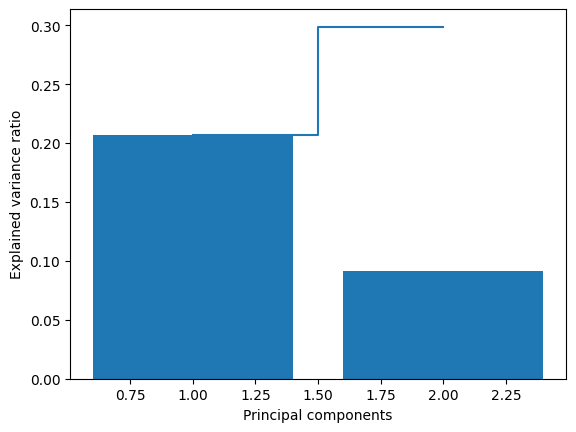

In [182]:
plot_graph(pca, 2)

#### 3 features

In [183]:
pca = PCA(n_components=3)
imgs_pca_3 = pca.fit_transform(scaled_imgs)

In [184]:
pca.explained_variance_ratio_

array([0.20722098, 0.09157013, 0.07027999])

In [186]:
imgs_pca_3[:10]

array([[-32.20028936, -16.73553644,  22.27957186],
       [-17.46150993,   5.89066989,  11.0187814 ],
       [-26.86147494,   6.84948671,   2.7933847 ],
       [ 23.03620721,   8.58352662,   4.42838578],
       [  0.52184702,  36.55557992,   9.8937784 ],
       [ -7.469548  ,  14.67117976, -31.25540948],
       [ 82.40213725,  -8.4810644 , -39.43172508],
       [ 13.22078355, -27.8894424 , -23.93657702],
       [-43.74406771,  26.20176129,  11.65915755],
       [-26.07126718,  -0.92821535,  -1.4033409 ]])

In [187]:
imgs_pca_3.shape

(66, 3)

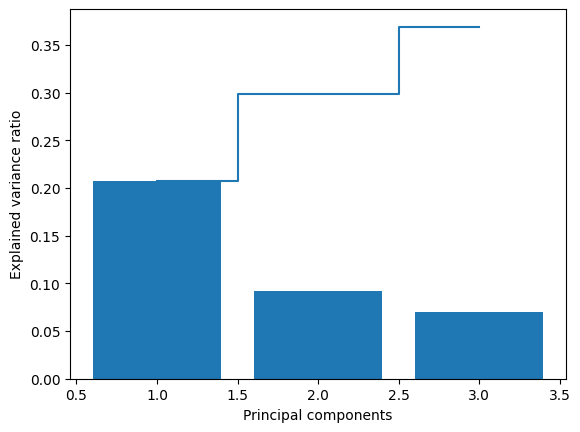

In [188]:
plot_graph(pca, 3)

First PCA feature describe above 20% of informations on photos.

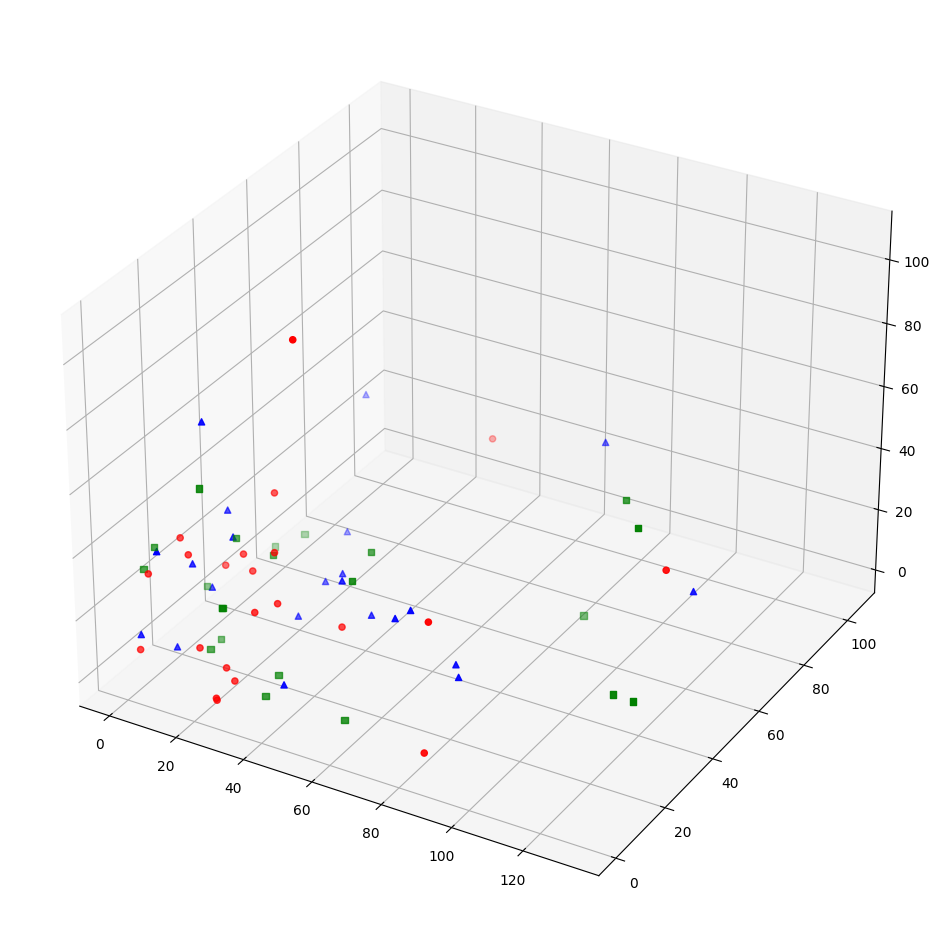

In [205]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(3):
    cls = plot_params[0][i]
    color = plot_params[1][i]
    marker = plot_params[2][i]
    points = abs(imgs_pca_3)[get_indexes(clss, cls)]
    ax.scatter(points[:,0], points[:,1], points[:,2],
                c=color, label=f'Class {cls}', marker=marker)


It is still hard to separate classes.

#### 9 features

In [191]:
pca = PCA(n_components=9)
imgs_pca_9 = pca.fit_transform(scaled_imgs)

In [192]:
pca.explained_variance_ratio_

array([0.20722098, 0.09157013, 0.07027998, 0.06215247, 0.04541056,
       0.03639822, 0.02921462, 0.02812348, 0.02450408])

In [193]:
imgs_pca_9[:10]

array([[-32.20030415, -16.73522683,  22.28327329, -19.55915732,
         10.04599079,  23.99131369, -16.81972129, -10.23535769,
         24.62981074],
       [-17.46147603,   5.89100887,  11.01680897,  -2.70016897,
         -2.86358033,  -3.55720169,  -2.72188084,  -1.23162853,
          2.20274443],
       [-26.86152124,   6.84922755,   2.79297037,   9.20162798,
         -7.66715376,  -8.82945504, -19.32557459,   7.34108387,
        -19.52956275],
       [ 23.03621705,   8.58422029,   4.4278073 , -16.97950658,
        -10.67934376, -30.51642156,  20.14898674, -33.05703085,
         -9.97021321],
       [  0.52186041,  36.55623902,   9.89004958, -41.57093107,
         16.19226712, -17.63598719, -10.05222068, -15.99408148,
         15.52652801],
       [ -7.46957573,  14.67064389, -31.25009863, -27.48751643,
          2.79541461, -13.8474827 ,   9.15154736,  -5.13019674,
         13.24387271],
       [ 82.40205186,  -8.4811534 , -39.42775462, -34.66902441,
         50.09171052,  34.2531

In [194]:
imgs_pca_9.shape

(66, 9)

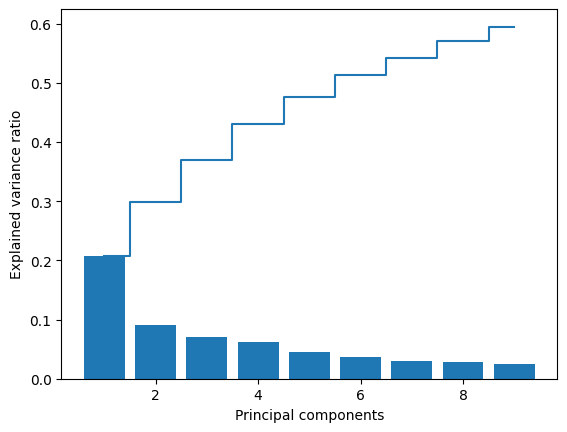

In [195]:
plot_graph(pca, 9)

Nine features describe aroud 60% of information on images.

#### 27 features

In [196]:
pca = PCA(n_components=27)
imgs_pca_27 = pca.fit_transform(scaled_imgs)

In [197]:
pca.explained_variance_ratio_

array([0.20722098, 0.09157013, 0.07027999, 0.06215247, 0.04541087,
       0.03639919, 0.02921721, 0.02812486, 0.0245433 , 0.02383493,
       0.02184274, 0.02120472, 0.01948778, 0.01784774, 0.01622799,
       0.01511667, 0.01462219, 0.01278587, 0.01163356, 0.01132699,
       0.01055564, 0.01045341, 0.00977277, 0.00935225, 0.00902212,
       0.00831791, 0.00768287])

In [199]:
imgs_pca_27[:3]

array([[-32.20028822, -16.73500317,  22.28025193, -19.55675839,
         10.04852999,  23.94143856, -17.01554555, -10.21272028,
         25.28442304,  -3.17168001,  13.77934072,  24.21771474,
        -20.45809808, -27.82603083, -25.34266914,  20.33828085,
        -11.18609691,  23.13372603,  -2.11130482,  -6.20658964,
          0.93162887, -20.37876314,   0.54896749,  21.14113912,
         -1.12635549,   0.39776808,  -3.11988765],
       [-17.46150972,   5.89075632,  11.01875066,  -2.70109915,
         -2.84013806,  -3.50220041,  -2.61627254,  -1.2436403 ,
          2.68852758,   6.72714686,  -4.81013009,  -4.77063356,
        -13.00639054,   2.10096665,   0.15941681,  -8.08173858,
         -7.42877383,  -1.31873463,   2.18484344,   7.26007217,
         -5.16825705,   7.20308122,  -3.33708562,  -3.21026232,
          5.80253305, -11.82691312,   0.22126144],
       [-26.86147501,   6.84926048,   2.7930918 ,   9.19693923,
         -7.70714846,  -8.85660213, -19.35974672,   7.20612469,
  

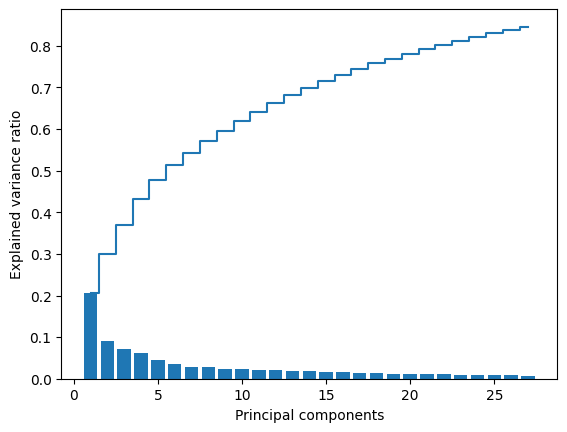

In [200]:
plot_graph(pca, 27)

#### All values

In [206]:
pca = PCA()
imgs_pca_all = pca.fit_transform(scaled_imgs)

In [208]:
imgs_pca_all.shape

(66, 66)

In [209]:
scaled_imgs.shape

(66, 12544)

In [211]:
cov_mat = np.cov(imgs_pca_all.T)
cov_mat

array([[ 2.63937037e+03, -6.37000549e-13, -7.88808279e-14, ...,
         3.46196674e-16,  9.02182901e-17,  2.04713716e-29],
       [-6.37000549e-13,  1.16632738e+03, -5.27270029e-13, ...,
         6.01795614e-15, -3.67060087e-16, -5.61797737e-29],
       [-7.88808279e-14, -5.27270029e-13,  8.95155103e+02, ...,
         7.72281027e-15, -4.87631123e-16,  1.70806369e-29],
       ...,
       [ 3.46196674e-16,  6.01795614e-15,  7.72281027e-15, ...,
         1.56793788e+01, -5.13914467e-17,  1.66622194e-29],
       [ 9.02182901e-17, -3.67060087e-16, -4.87631123e-16, ...,
        -5.13914467e-17,  4.40666074e-02,  3.54711650e-30],
       [ 2.04713716e-29, -5.61797737e-29,  1.70806369e-29, ...,
         1.66622194e-29,  3.54711650e-30,  1.82393706e-57]])

In [217]:
np.round(cov_mat, 3)[:3]

array([[2639.37 ,   -0.   ,   -0.   ,   -0.   ,    0.   ,    0.   ,
          -0.   ,   -0.   ,    0.   ,   -0.   ,   -0.   ,   -0.   ,
           0.   ,    0.   ,    0.   ,    0.   ,   -0.   ,   -0.   ,
          -0.   ,    0.   ,   -0.   ,   -0.   ,   -0.   ,   -0.   ,
           0.   ,   -0.   ,   -0.   ,    0.   ,    0.   ,   -0.   ,
          -0.   ,    0.   ,   -0.   ,   -0.   ,    0.   ,   -0.   ,
           0.   ,    0.   ,   -0.   ,   -0.   ,   -0.   ,    0.   ,
          -0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,   -0.   ,   -0.   ,    0.   ,    0.   ,   -0.   ,
           0.   ,    0.   ,   -0.   ,    0.   ,    0.   ,   -0.   ,
          -0.   ,    0.   ,   -0.   ,    0.   ,    0.   ,    0.   ],
       [  -0.   , 1166.327,   -0.   ,    0.   ,   -0.   ,   -0.   ,
           0.   ,    0.   ,   -0.   ,   -0.   ,    0.   ,   -0.   ,
           0.   ,   -0.   ,   -0.   ,    0.   ,    0.   ,    0.   ,
           0.   ,    0.   ,    0.   ,   -0.   ,

It turns out that covariance matrix after transformation is diagonal.

In [218]:
cov_mat.shape

(66, 66)

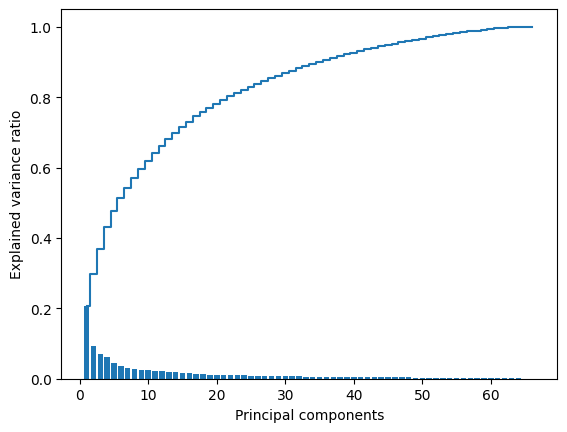

In [220]:
plot_graph(pca, 66)

In PCA method we can receive at most as many features, as samples (photos) we have.